In [7]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# Define dataset path
dataset_dir = "C:/Users/samik/Documents/GitHub/MS-disease/SplitDataset"

In [7]:
# Define batch size and image size
img_size = (146, 81)
batch_size = 128  # ✅ Larger batch for faster processing

In [8]:
# ✅ Load dataset without resizing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_dir, "train"),
    image_size=img_size,  # Keep the original patch size
    batch_size=batch_size,
    color_mode="grayscale",  # Load as grayscale
    label_mode="binary"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_dir, "val"),
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="binary"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_dir, "test"),
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="binary"
)

# ✅ Optimize dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

Found 198798 files belonging to 2 classes.
Found 24849 files belonging to 2 classes.
Found 24851 files belonging to 2 classes.


In [9]:
# ✅ Define CNN model (optimized for lesion detection)
model = keras.Sequential([
    keras.Input(shape=(146, 81, 1)),  # Maintain original patch size

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])
# ✅ Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 81, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 36, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,949,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,337,473 (12.73 MB)

 Trainable params: 3,337,473 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# ✅ Train the CNN model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Start with 10 epochs (increase if needed)
)

# ✅ Evaluate model on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")
model.save("ms_detection_modified.h5")

Epoch 1/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 1993s 1s/step - accuracy: 0.8309 - loss: 0.5427 - val_accuracy: 0.8536 - val_loss: 0.3000
Epoch 2/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 2013s 1s/step - accuracy: 0.8718 - loss: 0.2640 - val_accuracy: 0.8847 - val_loss: 0.2454
Epoch 3/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 2008s 1s/step - accuracy: 0.8858 - loss: 0.2420 - val_accuracy: 0.9010 - val_loss: 0.2175
Epoch 4/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 2878s 2s/step - accuracy: 0.9044 - loss: 0.2135 - val_accuracy: 0.9124 - val_loss: 0.2012
Epoch 5/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 1667s 1s/step - accuracy: 0.9180 - loss: 0.1889 - val_accuracy: 0.9176 - val_loss: 0.1971
Epoch 6/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 1645s 1s/step - accuracy: 0.9256 - loss: 0.1721 - val_accuracy: 0.9279 - val_loss: 0.1723
Epoch 7/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 1653s 1s/step - accuracy: 0.9344 - loss: 0.1551 - val_accuracy: 0.9282 - val_loss: 0.1746
Epoch 8/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 1653s 1s/step - accuracy: 0.9403 -

Test Accuracy: 0.9299


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\samik\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
# ✅ Load the trained model
model = tf.keras.models.load_model("ms_detection_modified.h5")

In [5]:
# ✅ Load the test dataset
dataset_dir = "C:/Users/samik/Documents/GitHub/MS-disease/SplitDataset"
img_size = (146, 81)
batch_size = 128

In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_dir, "test"),
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="binary"
)

Found 24851 files belonging to 2 classes.


In [9]:
# ✅ Get the true labels (y_test) and images (X_test)
y_test = np.concatenate([y.numpy() for _, y in test_ds])
X_test = np.concatenate([x.numpy() for x, _ in test_ds])

In [10]:
# ✅ Make predictions
y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

777/777 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step


In [11]:
# ✅ Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

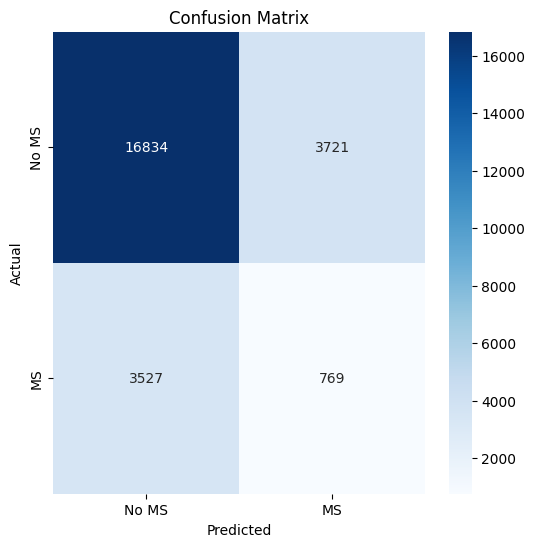

In [12]:
# ✅ Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No MS", "MS"], yticklabels=["No MS", "MS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# ✅ Print classification report
print(classification_report(y_test, y_pred, target_names=["No MS", "MS"]))

              precision    recall  f1-score   support

       No MS       0.83      0.82      0.82     20555
          MS       0.17      0.18      0.18      4296

    accuracy                           0.71     24851
   macro avg       0.50      0.50      0.50     24851
weighted avg       0.71      0.71      0.71     24851



In [14]:
import matplotlib.pyplot as plt

# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

NameError: name 'history' is not defined